<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/Stanford_W2A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

1.10.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

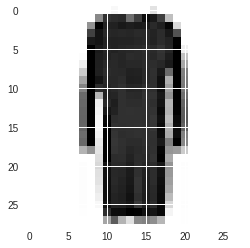

In [0]:

# Example of a picture# Examp 
index = 25
plt.imshow(train_images[index])


In [0]:
x_train = train_images#storing it for later use
y_test = test_images
train_images.shape
test_images.shape

(10000, 28, 28)

In [0]:
train_labels
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
X_flatten = train_images.reshape(train_images.shape[0], -1).T
y_flatten = test_images.reshape(test_images.shape[0], -1).T

In [0]:
X_flatten.shape

(784, 60000)

In [0]:

print ("sanity check after reshaping: " + str(X_flatten[0:5,0]))

sanity check after reshaping: [0 0 0 0 0]


In [0]:
norm_x_train = x_train/255.
norm_y_train = test_images/255.

So the equation is the vector of pixels of an image dotted with the weights (transposed) + the bias then passed through an activation function which outputs a number between 0-1. 

![alt text](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/LogReg_kiank.png)


For one example $x^{(i)}$:
![alt text](https://render.githubusercontent.com/render/math?math=%5Cmathcal%7BL%7D%28a%5E%7B%28i%29%7D%2C%20y%5E%7B%28i%29%7D%29%20%3D%20%20-%20y%5E%7B%28i%29%7D%20%20%5Clog%28a%5E%7B%28i%29%7D%29%20-%20%281-y%5E%7B%28i%29%7D%20%29%20%20%5Clog%281-a%5E%7B%28i%29%7D%29%5Ctag%7B3%7D&mode=display)

The cost is then computed by summing over all training examples:
![alt text](https://render.githubusercontent.com/render/math?math=J%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%3D1%7D%5Em%20%5Cmathcal%7BL%7D%28a%5E%7B%28i%29%7D%2C%20y%5E%7B%28i%29%7D%29%5Ctag%7B6%7D&mode=display)

Key steps: In this exercise, you will carry out the following steps:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

# 4 - Building the parts of our algorithm
# The main steps for building a Neural Network are:

Define the model structure (such as number of input features)
Initialize the model's parameters
Loop:
Calculate current loss (forward propagation)
Calculate current gradient (backward propagation)
Update parameters (gradient descent)
You often build 1-3 separately and integrate them into one function we call model().

**4.1 - Helper functions**
Exercise: Using your code from "Python Basics", implement sigmoid(). As you've seen in the figure above, you need to compute $sigmoid( w^T x + b)$ to make predictions.

In [0]:

# GRADED FUNCTION: sigmoid# GRADE 

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    s = 1 /(1+ (np.exp(-z)))
    ### END CODE HERE ###
    
    return s

In [0]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922



**4.2 - Initializing parameters**
Exercise: Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [0]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [0]:
dim = 4
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 [0.]]
b = 0


4.3 - Forward and Backward propagation
Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Exercise: Implement a function propagate() that computes the cost function and its gradient.

Hints:

Forward Propagation:

You get X
You compute ![alt text](https://render.githubusercontent.com/render/math?math=A%20%3D%20%5Csigma%28w%5ET%20X%20%2B%20b%29%20%3D%20%28a%5E%7B%280%29%7D%2C%20a%5E%7B%281%29%7D%2C%20...%2C%20a%5E%7B%28m-1%29%7D%2C%20a%5E%7B%28m%29%7D%29&mode=inline)
You calculate the cost function: ![alt text](https://render.githubusercontent.com/render/math?math=J%20%3D%20-%5Cfrac%7B1%7D%7Bm%7D%5Csum_%7Bi%3D1%7D%5E%7Bm%7Dy%5E%7B%28i%29%7D%5Clog%28a%5E%7B%28i%29%7D%29%2B%281-y%5E%7B%28i%29%7D%29%5Clog%281-a%5E%7B%28i%29%7D%29&mode=inline)

Here are the two formulas you will be using:

![alt text](https://render.githubusercontent.com/render/math?math=%5Cfrac%7B%5Cpartial%20J%7D%7B%5Cpartial%20w%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7DX%28A-Y%29%5ET%5Ctag%7B7%7D%24%24%24%24%20%5Cfrac%7B%5Cpartial%20J%7D%7B%5Cpartial%20b%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%3D1%7D%5Em%20%28a%5E%7B%28i%29%7D-y%5E%7B%28i%29%7D%29%5Ctag%7B8%7D&mode=display)



In [0]:

# GRADED FUNCTION: propagate# GRADED 

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [0]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.]
 [0.]]
db = 0.0
cost = 12.00012954638441


**d) Optimization¶**
You have initialized your parameters.
You are also able to compute a cost function and its gradient.
Now, you want to update the parameters using gradient descent.
Exercise: Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [0]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [0]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[1.]
 [2.]]
b = 2.0
dw = [[0.]
 [0.]]
db = 0.0



Exercise: The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There is two steps to computing predictions:

Calculate $\hat{Y} = A = \sigma(w^T X + b)$

Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [0]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [0]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


# 5 - Merge all functions into a model
You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Exercise: Implement the model function. Use the following notation:

- Y_prediction for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()

In [0]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [0]:

d = model(X_flatten, X_flatten, y_flatten, y_flatten, num_iterations = 2000, learning_rate = 0.005, print_cost = True)